<a href="https://colab.research.google.com/github/sarahtb13/Finanzas-Computacionales/blob/main/Taller_1_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mariangel Mantilla y Sarah Téllez 

1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene-2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. 

In [1]:
#Se importan las librerías 
import pandas as pd
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Descargar datos del mercado
!pip install yfinance 
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#Precios
activos = ["MCD","GE","IBM","T"]
precios1 = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios = precios1.loc[:,"Adj Close"]
precios

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124496,76.034485,43.710964,7.295422
2010-02-01,91.011139,78.997833,44.705177,7.279535
2010-03-01,103.782234,80.031326,47.111687,7.581749
2010-04-01,107.545784,80.499367,49.844337,7.646299
2010-05-01,93.232925,78.165504,47.217598,7.283845
...,...,...,...,...
2021-08-01,105.016113,126.196449,232.276596,19.121511
2021-09-01,102.644997,126.366852,237.139893,18.835596
2021-10-01,104.559372,113.787476,241.506805,17.615223


In [4]:
#a) Retornos logarítmicos 
retornos=np.log(precios/precios.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001245,0.038233,0.022490,-0.002180
2010-03-01,0.131313,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056384,0.008478
2010-05-01,-0.142816,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


Interpretación: En este punto podemos iniciar con los retornos logarítmicos los cuales nos dan un panorama más claro respecto a los retornos para varios periodos, dado su característica de ser compuestos o continuos. Al identificar los resultados obtenidos de los retornos de las cuatro acciones (GE, IBM, MCD, T) encontramos una tendencia negativa por parte de los retonos de las acciones de GE en el tiempo estimado del análisis, lo que nos dice que en algunos meses estas acciones tuvieron pérdidas o ganancias no tan óptimas si vemos los niveles de retornos por debajo de 0. Sin embargo, podemos destacar que las otras tres acciones IBM, MCD y T no tuvieron una tendencia clara con respecto al valor de sus retornos dado su variabilidad de los precios en cada mes donde unos mantienen niveles positivos y altos mientras otos alcanzan niveles negativos de retornos.

In [5]:
#b) Estadística Descriptiva  
Statistics= {"Media":retornos.mean(),"Mediana":retornos.median(),
             "Std":retornos.std(),"Curtosis":retornos.skew(),
             "Simetría":retornos.kurt()}
DF_Est=pd.DataFrame(Statistics)
DF_Est


,Media,Mediana,Std,Curtosis,Simetría
GE,0.000231,-0.001930,0.086937,-0.088296,3.040759
IBM,0.003689,0.002619,0.060536,-0.564633,2.653582
MCD,0.012605,0.011742,0.042488,-0.410192,1.596979
T,0.006158,0.006483,0.048299,-0.707903,1.549797


Interpretación:

Ahora bien, con respecto a las medidas descriptivas de los retornos para cada acción, podemos encontrar que el retorno promedio de resultados para la acción de GE se centra entre los 0.000231  con un valor medio de -0.001929, parecido al valor promedio de IBM con 0.003458 puntos por encima del promedio de la anterior acción y con un punto medio de 0.002619. Por otro lado, las acciones de MCD se posiciona en un mayor promedio de retornos en la periodicidad establecida con respecto a todas las acciones, siendo este de 0.012605, y un punto central de 0.011742 es decir, 0.006447 puntos por encima de las acciones de T y 0,005259 puntos del valor central de esta acción. Adicionalmente la desviación estándar nos muestra que tan dispersos están los retornos de las acciones con respecto a la media, en el caso general de los resultados obtenidos podemos evidenciar niveles parcialmente parecidos entre un rango de 0.04 a 0.08, no obstante podemos destacar la desviación estándar de la acción GE que cuenta con un valor alto de dispersión del resultado de retorno de 0.086937, con esto podemos definir que sus retornos mantienen un alto grado de variabilidad en relación con el retorno promedio de la acción. Así mismo, los resultados de la curtosis para las cuatro acciones nos muestra niveles de curtosis Mesocúrtica con muy poca concentración de datos en la media, altos niveles de dispersión y con un menor apuntamiento de la distribución de los retornos alrededor de los valores centrales. Por último, de acuerdo de los resultados de simetría podemos apreciar el grado de concentración que presentan los resultados alrededor de la zona central de la distribución de frecuencia en el caso de las acciones, se tiene que la distribución es sesgada hacia la izquierda. 


In [6]:
#c) DataFrame retornos esperados y volatilidades anualizadas
RR= {"Retornos Esperados":retornos.mean(),"Volatilidades Anualizadas":retornos.std()*np.sqrt(12)}
DF_RR=pd.DataFrame(RR)
DF_RR

,Retornos Esperados,Volatilidades Anualizadas
GE,0.000231,0.301157
IBM,0.003689,0.209703
MCD,0.012605,0.147183
T,0.006158,0.167311


Interpretación: Respecto a las cuatro acciones: General Electric Company, International Business Machines Corporation, Mc'Donalds y AT&T, se puede concluir que la mejor es Mc'Donalds, dada la relación riesgo/retorno. En efecto, esta acción es la que ofrece una mayor rentabilidad al ser de 1.3% y la que tiene el menor nivel de riesgo con 14.7%, es decir, se logra un mayor nivel de rentabilidad con el menor riesgo posible.

In [7]:
#d) Matriz de correlaciones de Pearson
corr_p=retornos.corr()
corr_p

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151318,0.346994
IBM,0.363578,1.000000,0.322562,0.412457
MCD,0.151318,0.322562,1.000000,0.338351
T,0.346994,0.412457,0.338351,1.000000


In [8]:
#d) Matriz de correlaciones de Spearman
corr_s=retornos.corr(method="spearman")
corr_s

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


Interpretación: 
La correlación de Pearson nos muestra el grado de relación lineal entre cada par de retornos de las acciones, así mismo podemos identificar la fuerza  y la dirección de las relaciones, por lo anterior en estos resultados encontramos correlaciones lineales positivas, para ejemplificar lo anterior podemos ver que los retornos de la acción GE y las acciones de IBM tienen una correlación lineal positiva de 0.3635 mientras que los retornos de GE y de MCD mantiene una correlación mínima. Por otro lado, si vemos la correlación de Spearman, al igual que el de Pearson, muestra una asociación entre las acciones. Sin embargo, este permite obtener un coeficiente de asociación entre acciones que no se comportan normalmente, si comparamos los valores de las dos correlaciones podemos identificar que las de Spearman mantiene valores más bajos de correlaciones entre las acciones, es deci,r existe una correlación mínima/baja positiva entre cada valor de retorno, esto lo podemos ver con los resultados de IBM y T el cual tuvo una disminución en su nivel de correlación de 0,053713.


In [ ]:
#Sturge's Rule
Sturgr=np.log(len(retornos['MCD']))*3.21+1
Sturgr

16.9307312631343

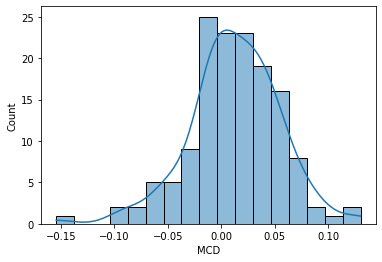

In [9]:
# e) Histograma Mc'Donalds
import seaborn as sbn 
sbn.histplot(data=retornos, x="MCD", kde=True, bins=17);


Interpretación: 



1.   Para las acciones de MCD podemos inciar con el análisis de los picos del histograma, donde podemos destacar que el pico de los datos de los retornos se encuentra cercano o en el punto 0,0. 

2. Los datos mantienen una concentración y distribución central cercana a la media (0.012605) una gran propoción de los retornos se encuentran cercanos a este valor y a 0,0

3.   Con respecto a la simetría podemos observar que el histograma presenta datos de retornos asimétricos con tendencia a izquierda, dado que son valores de retornos negativos o que presentan fallas. Esto también lo podemos evidenciar con datos atípicos como el que muestra el histrograma de -0.15

4. El rango donde se tuvieron más valores de retornos comunes se establece entre 0,03 a 0,05 y los rangos donde se encontraron retornos poco comunes fue en los puntos -0,10 y 0,10







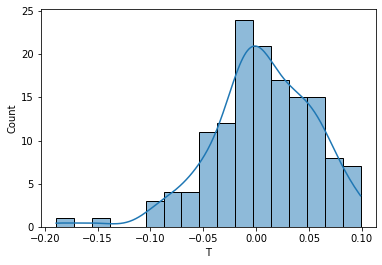

In [ ]:
#e) Histograma AT&T
import seaborn as sbn 
sbn.histplot(data=retornos, x="T", kde=True, bins=17);

Interpretación:



1.  Respecto al análisis de curtosis de la gráfica, podemos encontrar una distribución mesocúrtica en donde el pico de la grafica no se encuentra tan alargado y con ó de los retornos sobre la media, la cual se concentra en 0.006158. No obstante, hay que destacar que los retornos mantienen altos niveles de valores en positivos entre rangos de 0,0 a 0,05

2.   Adicionalmente, encontramos un problema de colas gruesas en el histograma lo que nos puede decir que la media y la desviación no cumplen niveles de normalidad o no son suficientes.

3. Al igual que el histograma anterior, encontramos una asimetría en los retornos a la izquierda con valores negativos y datos atípicos entre los puntos -0,20 y -0,15 





In [10]:
#f) Pruebas normalidad
GE=stats.kstest(retornos['GE'],'norm') 
IBM=stats.kstest(retornos['IBM'],'norm') 
MCD=stats.kstest(retornos['MCD'],'norm') 
T=stats.kstest(retornos['T'],'norm') 


In [11]:
#f) DataFrame pruebas normalidad
PN= {"GE":stats.kstest(retornos['GE'],'norm'),"IBM":stats.kstest(retornos['IBM'],'norm'), 
"MCD":stats.kstest(retornos['MCD'],'norm'), "T":stats.kstest(retornos['T'],'norm') }
DF_PN=pd.DataFrame(PN,index=['statistic','pvalue'])
DF_PN

,GE,IBM,MCD,T
statistic,4.159825e-01,4.372657e-01,4.543298e-01,4.606994e-01
pvalue,6.374947e-23,2.144139e-25,1.736418e-27,2.713489e-28


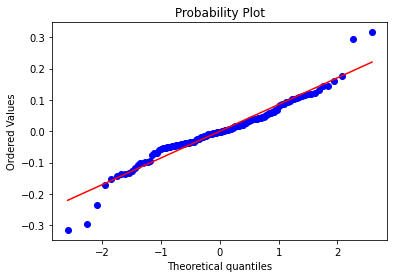

In [12]:
#Gráfico Q-Q General Electric Company 
import scipy.stats as stats
import pylab as py 
stats.probplot(retornos['GE'], dist="norm", plot=py)
py.show()

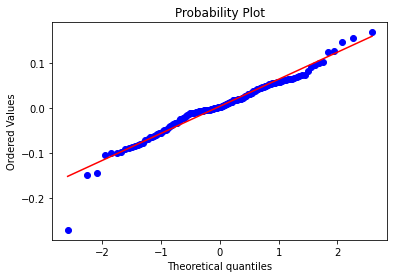

In [13]:
#Gráfico Q-Q IBM
import scipy.stats as stats
import pylab as py #facilitar construcción gráfica
stats.probplot(retornos['IBM'], dist="norm", plot=py)
py.show()



Interpretación:

Para este caso, podemos notar que el p value es menor a 0.05, por tanto, se puede establecer que las acciones no se distribuyen de manera normal. En efecto, esto se pudo observar en los histogramas de las acciones Mc'Donalds y AT&T, así como en los gráficos Q-Q para las acciones de IBM y General Electric Company, puesto que para cada una de las acciones los datos no se ajustan a la línea teórica de la distribución normal y se puede observar el problema de curtosis, lo cual es común en las series financieras.

2. Con la misma información del punto 1:

In [ ]:
#a) volatilidad Close to Close mensual y anualizada 
DSM=retornos.std()
DSA=retornos.std()*np.sqrt(12)

In [ ]:
#a) volatilidad mensual y anualizada Parkinson
lnHL = np.log(precios1["High"]/precios1["Low"]).dropna()
sigmaParkMens = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2)).mean()**0.5 
sigmaParkAn=sigmaParkMens*np.sqrt(12)




In [ ]:
#a) volatilidad mensual y anualizada  Garman-Klass 
lnHL = np.log(precios1["High"]/precios1["Low"]).dropna()
lnCO = np.log(precios1["Close"]/precios1["Open"]).dropna()
sigmaGKMen= ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2)).mean()**0.5
sigmaGKAn=sigmaGKMen*np.sqrt(12)


In [ ]:
#a) EWMA
def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) 
  l = np.repeat(Lambda,m) 
  varewma = (((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda)).mean()
  EWMAvol = np.sqrt(varewma) 
  return(EWMAvol)

In [ ]:
#a) Volatilidades mensuales EWMA
EW1=EWMAvol(retornos['GE'],0.94)
EW2=EWMAvol(retornos['IBM'],0.94)
EW3=EWMAvol(retornos['MCD'],0.94)
EW4=EWMAvol(retornos['T'],0.94)
MnE=EW1,EW2,EW3,EW4
MnE
Y={"EWMA M":MnE}
DF_Y=pd.DataFrame(Y,index=['GE','IBM','MCD','T'])
DF_Y

,EWMA M
GE,0.105384
IBM,0.074008
MCD,0.052483
T,0.054351


In [ ]:
#a) Volatilidades anuales EWMA
ew1=EWMAvol(retornos['GE'],0.94)*np.sqrt(12)
ew2=EWMAvol(retornos['IBM'],0.94)*np.sqrt(12)
ew3=EWMAvol(retornos['MCD'],0.94)*np.sqrt(12)
ew4=EWMAvol(retornos['T'],0.94)*np.sqrt(12)
AnE=ew1,ew2,ew3,ew4
AnE
X={"EWMA A":AnE}
DF_X=pd.DataFrame(X,index=['GE','IBM','MCD','T'])
DF_X

,EWMA A
GE,0.365061
IBM,0.256371
MCD,0.181807
T,0.188278


In [ ]:
#a) DataFrame Volatilidades
F1= {"Close to Close M":DSM,"Parkinson M":sigmaParkMens,"Garmann-Klass M":sigmaGKMen}
DF_F1=pd.DataFrame(F1)
F2= {"Close to Close A":DSA,"Parkinson A":sigmaParkAn,"Garmann-Klass A":sigmaGKAn}
DF_F2=pd.DataFrame(F2)
pd.concat([DF_F1,DF_Y, DF_F2,DF_X], axis=1)

,Close to Close M,Parkinson M,Garmann-Klass M,EWMA M,Close to Close A,Parkinson A,Garmann-Klass A,EWMA A
GE,0.086937,0.093021,0.094820,0.105384,0.301157,0.322234,0.328467,0.365061
IBM,0.060536,0.062220,0.063019,0.074008,0.209703,0.215535,0.218304,0.256371
MCD,0.042488,0.049406,0.052101,0.052483,0.147183,0.171148,0.180484,0.181807
T,0.048299,0.054067,0.055676,0.054351,0.167311,0.187294,0.192866,0.188278


Interpretación:

En este resumen de volatilidades podemos encontrar los diferentes medidas para ver la volatilidad del valor de los retornos de las acciones desde diferentes peridiocidades (mensuales- anuales).Como referencia para el análisis se tomará la acción de GE con tal de comparar estas diferencias de los resultados entre los distintas medidas.

La volatilidad close to close nos muestra que tan volátil puede ser una acción de acuerdo a la velocidad de cambio del precio de cierre, bajo este supuesto GE mantiene una alta volatilidad en la que el precio cambia rápidamente y con mayor amplitud en comparación con las demás acciones (ya sea en una peridiocidad mensual o anual). Sin embargo este metodo no resulta ser tan eficiente dado que solo se basa en precios de cierre y datos históricos. 

En contraste, los modelos Parkinson y Garmann-Klass tienen en cuenta variables similares para calcular el nivel de volatilidad de la acción. En el primer modelo encontramos niveles de una alta variación de los mínimos y máximos del valor del retorno para la acción de GE en escenarios mensuales y anuales. Ahora bien, si agregamos los precios de apertura y cierre más relevantes como lo estima el modelo Germann-Klass podemos decir que igualmente los retornos de GE tuvieron una alteración en el nivel de apertura y cierre entre los 0.094 mensuales y 0.328 en un escenario anual. 

Para finalizar, el modelo de volatilidad EWMA nos presenta las variaciones significantes del retorno para cada acción, nuevamente los retornos de GE respondieron al modelo con valores altos de volatilidad alcanzando mensualmente retornos entre los 0,105 y anualmente 0,36. Esto nos da como conclusión, que la acción que tiene mayor grado de volatilidad con respecto al valor de sus retornos es General Eletric en donde en los cuatro modelos de volatilidad en las diferentes peridiocidades mantiene niveles altos.

[*********************100%***********************]  1 of 1 completed


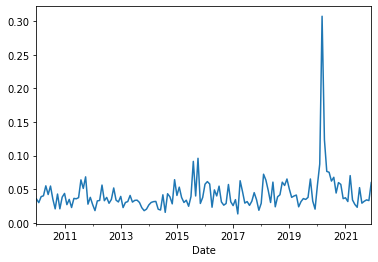

In [ ]:
#b) Gráfica volatilidad Parkinson
activoM = ["MCD"]
preciosM = yf.download(activoM,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
preciosM
lnHL = np.log(preciosM["High"]/preciosM["Low"]).dropna()
sigmaP = ((1/(4*np.log(2)))*lnHL**2)**0.5 
sigmaP.plot();


[*********************100%***********************]  1 of 1 completed


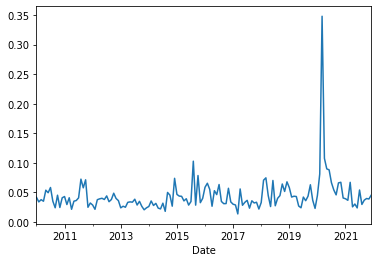

In [ ]:
#b) Gráfica volatilidad Garman-Klass
activoM = ["MCD"]
preciosM = yf.download(activoM,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
preciosM
lnHL = np.log(preciosM["High"]/preciosM["Low"]).dropna()
lnCO = np.log(preciosM["Close"]/preciosM["Open"]).dropna()
sigmaM= (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaM.plot();

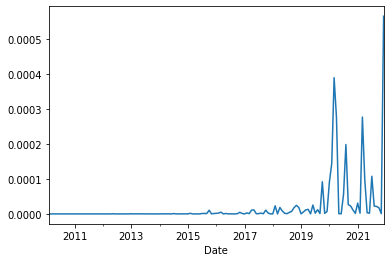

In [ ]:
#b) Gráfica volatilidad EWMA
Lambda= 0.94
m = len(retornos) 
b = np.arange(m-1,-1,-1) 
l = np.repeat(Lambda,m) 
varewma = ((np.power(retornos['MCD'],2)*(np.power(l,b))))*(1-Lambda) 
varewma.plot()

En este punto podemos distingir los diferentes métodos para estimar la volatilidad, en estos tres modelos Parkinson, Garman-Klass y EWMA la volatilidad se puede estimar a partir de la diferencia entre el precio más alto y el más bajo del día. Si analizamos la grafica de la volatilidad de Parkinson de valores extremos, esta solo abarca puntos máximos y mínimos de los retornos de la acción, así podemos notar que durante el periodo de 2011 y 2015 las fluctuaciones de los retornos de MCD tuvieron una tendencia similar donde no se observó mayor variación de los precios, a diferencia de los años de 2017 a 2021 donde se presentaron diferentes altos y bajos de precios de retornos siendo el 2020 el año con el mayor nivel de volatilidad cercana a 0,35, esto puede ser explicado por efectos de la pandemia donde la industria de comida rápida se vio afectada dada a las medidas de prevención y aislamiento. Desde otra orilla encontramos la volatilidad Garman-Klass, la cual tiene en cuenta los precios mínimos y máximos y añade los precios de apertura y cierre en su cálculo de volatilidad, por lo que encontramos niveles relevantes de apertura y cierre en los años 2011, 2016 a 2021, alcanzando niveles entre los 0,10 y 0,35. Por último el modelo EWMA nos da un panorama mas dinámico en la medida en que este metodo permite evaluar las fuertes variaciones en los valores de retornos de las acciones, con el fin de generar pronósticos de las épocas más volátiles de la acción, con lo anterior podemos decir que desde el año 2011 al 2019 no se tuvieron valores relevantes de fluctuaciones de la acción. Por otro lado,se puede notar que desde finales del 2019 al 2021 se toman niveles de alta volatilidad del precio de la acción teniendo picos altos y bajos de un años a otro, dado a los efectos del panorama social y económico.

Referencias:

Análisis de normalidad: gráficos y contrastes de hipótesis. https://www.cienciadedatos.net/documentos/8_analisis_normalidad

Elementos de Estadistica Descriptiva. https://www.funlam.edu.co/uploads/fondoeditorial/120_Ebook-elementos_basicos.pdf

Estimación de la volatilidad de los precios de las acciones. https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-10422011000200009

Histogramas. https://www.jmp.com/es_pe/statistics-knowledge-portal/exploratory-data-analysis/histogram.html

Guia de Asociacion entre variables (Pearson y Spearman) https://www.u-cursos.cl/facso/2014/2/SO01007/1/material_docente/bajar?id_material=994690

Volatilidad Dinamica (EWMA) https://www.economaticacolombia.com/volatilidad-dinamica-ewma/

Volatilidad Ewna VS Volatilidad Historica. https://repository.javeriana.edu.co/handle/10554/9571

Retornos Logaritmicos. https://es.coursera.org/lecture/algoritmos-de-negociacion-basados-en-machine-learning/retornos-logaritmicos-6yFpx



